# Artwork Classification Database

This is the code that was used to create and populate the database. This notebook file conists of multiple functions used to do this (our API).

In [1]:
import pandas as pd

# read data in and show head

#columns = ['image_filename','painting_name','artist_name','artist_years','style','artist_school','misc','file_info','web_url','release_year']
df_c1 = pd.read_csv('Data/wga_cleaned_date.csv', encoding = 'utf-8')
df_c1


image_filename  \
0      wgaScraping/slewinsk_roughsea.jpg   
1        wgaScraping/aachen_allegory.jpg   
2         wgaScraping/aachen_bacchus.jpg   
3        wgaScraping/aachen_j_couple.jpg   
4         wgaScraping/aachen_rudolf2.jpg   
5        wgaScraping/aachen_selfport.jpg   
6       wgaScraping/aagaard_deerlake.jpg   
7       wgaScraping/aagaard_rosegard.jpg   
8         wgaScraping/abadia_michael.jpg   
9        wgaScraping/abbate_chimney1.jpg   
10       wgaScraping/abbate_chimney2.jpg   
11       wgaScraping/abbate_deerhunt.jpg   
12        wgaScraping/abbate_orpheus.jpg   
13       wgaScraping/abbate_proserpi.jpg   
14         wgaScraping/abbate_scipio.jpg   
15        wgaScraping/abbati_abbati1.jpg   
16        wgaScraping/abbati_abbati2.jpg   
17        wgaScraping/abbati_abbati3.jpg   
18        wgaScraping/abbati_abbati4.jpg   
19      wgaScraping/abbatini_cornaro.jpg   
20      wgaScraping/abildgaa_andria1.jpg   
21      wgaScraping/abildgaa_andria2.jpg   
22     wgaScraping/abildgaa_culmingh.jpg   
23     wgaScraping/abildgaa_philocte.jpg   
24     wgaScraping/abildgaa_z_adamev.jpg   
25     wgaScraping/achenbac_firework.jpg   
26          wgaScraping/adam1_battle.jpg   
27            wgaScraping/adam1_hunt.jpg   
28          wgaScraping/ademollo_ark.jpg   
29         wgaScraping/ademollo_ark1.jpg   
...                                  ...   
15670  wgaScraping/federico_selfport.jpg   
15671    wgaScraping/federico_taddeo.jpg   
15672    wgaScraping/taddeo_farnese1.jpg   
15673    wgaScraping/taddeo_farnese2.jpg   
15674    wgaScraping/taddeo_farnese3.jpg   
15675    wgaScraping/taddeo_farnese4.jpg   
15676    wgaScraping/taddeo_farnese5.jpg   
15677    wgaScraping/taddeo_farnese6.jpg   
15678    wgaScraping/taddeo_farnese7.jpg   
15679    wgaScraping/taddeo_farnese8.jpg   
15680    wgaScraping/taddeo_farnese9.jpg   
15681    wgaScraping/taddeo_malenude.jpg   
15682    wgaScraping/antonio_lunette.jpg   
15683  wgaScraping/francesc_composit.jpg   
15684      wgaScraping/jacopo_1coral.jpg   
15685     wgaScraping/jacopo_1coral1.jpg   
15686    wgaScraping/jacopo_2creatio.jpg   
15687    wgaScraping/jacopo_assembly.jpg   
15688    wgaScraping/jacopo_bathsheb.jpg   
15689    wgaScraping/jacopo_fourelem.jpg   
15690     wgaScraping/jacopo_miracle.jpg   
15691    wgaScraping/jacopo_portlady.jpg   
15692    wgaScraping/jacopo_ruspoli1.jpg   
15693    wgaScraping/jacopo_ruspoli2.jpg   
15694      wgaScraping/jacopo_silver.jpg   
15695     wgaScraping/zugno_rinaldo1.jpg   
15696     wgaScraping/zugno_rinaldo2.jpg   
15697     wgaScraping/zugno_virgin_c.jpg   
15698   wgaScraping/zuloaga_celestin.jpg   
15699      wgaScraping/zuloaga_dwarf.jpg   

                                           painting_name  \
0                                 Rough Sea at Belle-Ile   
1                                               Allegory   
2                               Bacchus; Ceres and Cupid   
3                                          Joking Couple   
4                          Portrait of Emperor Rudolf II   
5                     Self-Portrait with a Glass of Wine   
6                                     Deer beside a Lake   
7                                        The Rose Garden   
8                                  The Archangel Michael   
9                                         Chimney breast   
10                                        Chimney breast   
11                                             Stag Hunt   
12                                  Orpheus and Eurydice   
13                                The Rape of Proserpine   
14                              The Continence of Scipio   
15                          Landscape at Castiglioncello   
16                           Country Road with Cypresses   
17                                              Cloister   
18                                   Portrait of a Woman   
19                 Gian Lorenzo Bernini's Cornaro Chapel   
20      The Midwife Taking Leave of t

Artwork Database Schema

<img src="artwork_schema.jpg", width = "750">

In [2]:
import sqlite3
import csv

conn = sqlite3.connect('artwork.db')
c = conn.cursor()

## Create Database

The SQL database (below) was created based upon the schema above.

In [3]:
def create_database(conn):
    """
    Using the database connection conn, create tables appropriate for 
    storing and using artwork data.  Drops any pre-exsiting tables that would be re-defined by this procedure.
    """
    c = conn.cursor()
    # YOUR CODE HERE
    
    c.execute('''DROP TABLE IF EXISTS paintings''')
    c.execute('''DROP TABLE IF EXISTS artists''')
    c.execute('''DROP TABLE IF EXISTS styles''')
    c.execute('''DROP TABLE IF EXISTS fact_table''')
    
    # Create database with tables.
    
    #------------------------------------------------------------------------------------------
    # Create paintings table 
    
    c.execute('''
            CREATE TABLE paintings(
                id INTEGER,
                image_filename text,
                title text,
                release_year int,
                misc text,
                file_info text,
                web_url text,
                source text,
                PRIMARY KEY(id),
                UNIQUE (image_filename))''')
    
    # Create artists table 
    c.execute('''
            CREATE TABLE artists(
                id INTEGER,
                artist_name text,
                artist_school text,
                artist_years text,
                PRIMARY KEY(id),
                UNIQUE (artist_name))''')
      
    # Create styles table 
    c.execute('''
            CREATE TABLE styles(
                id INTEGER,
                style text,
                PRIMARY KEY(id),
                UNIQUE (style))''')
    
    # Creat fact_table
    c.execute('''
            CREATE TABLE fact_table(
                painting_id INTEGER,
                artist_id INTEGER,
                style_id INTEGER,
                FOREIGN KEY (painting_id) REFERENCES paintings(id) 
                FOREIGN KEY (artist_id) REFERENCES artists(id)
                FOREIGN KEY (style_id) REFERENCES styles(id)) 
                ''')
    
    # Commit all changes
    conn.commit()
create_database(conn)

## Populate Database (Collection 1)

Coloumn Lables:

~~~~
0 image_filename
1 painting_name
2 artist_name
3 artist_years
4 style
5 artist_school
6 misc
7 file_info
8 web_url
9 release_year
10 source
~~~~

In [4]:
def populate_database(conn, csv_file):    
    reader = csv.reader(open(csv_file, encoding='utf-8'))
    c = conn.cursor()
    
    next(reader, None)
    for row in reader:
        row = [item.lower() for item in row]
        
        # Insert data into dimension tables  
        #------------------------------------------------------------------------------------------------------------
        
        # Paintings dimension table
        
        try:
            c.execute('''
                INSERT INTO paintings(
                    image_filename,
                    title,
                    release_year,
                    misc,
                    file_info,
                    web_url,
                    source) VALUES (?,?,?,?,?,?,?)
                ''', (row[0],row[1],row[9],row[6],row[7],row[8],row[10]))
        
        except sqlite3.Error as e:
            print("paintings, insert error:", e.args[0])
            
        # Artists dimension table
            
        try:
            c.execute('''
                INSERT INTO artists (artist_name, artist_school, artist_years) VALUES (?,?,?)
                ''', (row[2],row[5],row[3]))
        
        except sqlite3.Error as e:
            print("artists, insert error:", e.args[0])
        
        # Styles dimension table
        
        try:
            c.execute('''
                INSERT INTO styles (style) VALUES (?)
                ''', (row[4],))
        
        except sqlite3.Error as e:
            print("styles, insert error:", e.args[0])
        
        # Insert fact table
        
        try:
            # This INSERT SELECT statement looks up and uses appropriate dimension ids 
            # for each row the of the fact_table.
            # WHERE is the condition for a selection
            c.execute('''
                INSERT INTO fact_table (painting_id,artist_id,style_id) 
                SELECT paintings.id, artists.id, styles.id 
                FROM paintings, artists, styles
                WHERE paintings.image_filename = ? AND artists.artist_name = ? AND styles.style = ?
                ''', (row[0],row[2],row[4]))
                      
        except sqlite3.Error as e:
            print("fact_table, insert error:", e.args[0])
        
        conn.commit()
        
populate_database(conn, 'Data/wga_cleaned_date.csv')
populate_database(conn, 'Data/artuk_cleaned.csv')
populate_database(conn, 'Data/artuk2_cleaned.csv')


artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE 

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint faile

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constrai

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint fail

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constrai

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constra

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE 

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE 

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE 

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constra

styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint faile

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constra

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE 

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE 

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE 

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE 

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constrai

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constra

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constra

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint faile

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE 

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constra

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constrai

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constra

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE 

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE 

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE 

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: style

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constrai

styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constrai

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constrai

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE 

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constra

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constrai

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE 

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constrai

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE 

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE 

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint fail

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constrai

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constrai

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE 

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constrai

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE 

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constra

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE 

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constra

styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint fail

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE 

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE 

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE 

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint fail

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE

styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constra

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE 

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE 

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constra

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint fail

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE

styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constrai

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint fail

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE 

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE 

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE

styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert 

styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name


styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style


styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style


styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint faile

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style


styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert 

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, 

styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style


artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: style

styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint faile

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint faile

styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert e

styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.arti

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint fail

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: style

styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: style

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: style

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error:

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: style

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, 

styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style


artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint fail

styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert e

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: arti

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint faile

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constrai

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE 

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE 

styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constrai

styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style


styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: arti

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint fail

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint faile

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint fail

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constrai

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint faile

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constrai

artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style


styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint fail

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: arti

styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: style

styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
artists, insert error: UNIQUE constraint failed: artists.artist_name
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style
styles, insert error: UNIQUE constraint failed: styles.style


In [5]:
!pip install ipython-sql

In [6]:
%reload_ext sql
%sql sqlite:///artwork.db

'Connected: None@artwork.db'

In [7]:
%%sql

select *
from styles

Done.


[(1, 'impressionism'),
 (2, 'mannerism'),
 (3, 'realism'),
 (4, 'early renaissance'),
 (5, 'baroque'),
 (6, 'romanticism'),
 (7, 'neoclassicism'),
 (8, 'northern renaissance'),
 (9, 'rococo'),
 (10, 'medieval'),
 (11, 'high renaissance'),
 (12, ''),
 (13, 'abstract art'),
 (14, 'surrealism'),
 (15, 'expressionism'),
 (16, 'cubism'),
 (17, 'post-impressionism'),
 (18, 'fauvism'),
 (19, 'modern art'),
 (20, 'academicism'),
 (21, 'pop art'),
 (22, 'neo-romanticism'),
 (23, 'primitivism'),
 (24, 'constructivism'),
 (25, 'naturalism'),
 (26, 'primtivism')]

In [8]:
%%sql

select count(*)
from paintings

Done.


[(32129,)]

In [9]:
%%sql

select count(*)
from artists

Done.


[(7847,)]

In [10]:
%%sql

select count(*)
from styles
where style IS NOT ''

Done.


[(25,)]

## Generate Style List

This part generates a list of the top 12 styles as well as the number of images per style.

In [11]:
df = pd.read_sql(('''
    SELECT style, COUNT(style)
    FROM fact_table f
    JOIN styles s ON f.style_id = s.id
    JOIN paintings p ON f.painting_id = p.id
    GROUP BY style 
    ORDER BY COUNT(style) DESC
    LIMIT 20
         '''), con=conn)

In [12]:
df = df.drop(df.index[1])
df = df.reset_index(drop=True)
df = df.drop(df.index[12:])
df


style  COUNT(style)
0                baroque          7868
1            romanticism          2649
2          impressionism          2246
3                 rococo          2229
4              mannerism          1381
5                realism          1124
6      early renaissance          1073
7   northern renaissance          1003
8          neoclassicism           934
9               medieval           764
10      high renaissance           728
11    post-impressionism           692

In [13]:
#df.to_csv('style_count.csv', index=False, encoding='utf-8')

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
df.columns = ['Painting style','Number of paintings']
df


Painting style  Number of paintings
0                baroque                 7868
1            romanticism                 2649
2          impressionism                 2246
3                 rococo                 2229
4              mannerism                 1381
5                realism                 1124
6      early renaissance                 1073
7   northern renaissance                 1003
8          neoclassicism                  934
9               medieval                  764
10      high renaissance                  728
11    post-impressionism                  692

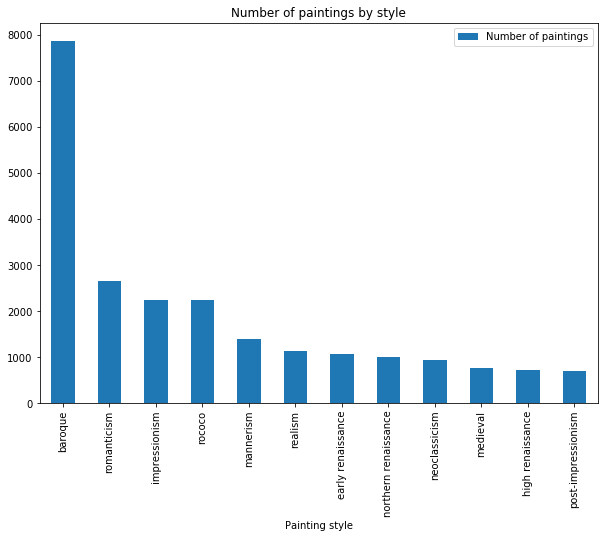

In [16]:
#dataframe = pd.DataFrame(data = df, columns = ['Painting Style', 'Number of paintings'])
df.plot.bar(x='Painting style',y='Number of paintings', title='Number of paintings by style', figsize=(10,7))


In [17]:
%%sql

SELECT image_filename, count(style)
FROM fact_table f
JOIN styles s ON f.style_id = s.id
JOIN paintings p ON f.painting_id = p.id
WHERE style IN (
    SELECT style
    FROM fact_table f
    JOIN styles s ON f.style_id = s.id
    JOIN paintings p ON f.painting_id = p.id
    WHERE style IS NOT ''
    GROUP BY style
    HAVING count(image_filename) >= 344) 

Done.


[('artukscrapingartists/forging-the-anc_joseph-wri_14010_uk.jpg', 22691)]

In [18]:
df_keras = pd.read_sql(('''
    SELECT image_filename, count(style)
    FROM fact_table f
    JOIN styles s ON f.style_id = s.id
    JOIN paintings p ON f.painting_id = p.id
    WHERE style IN (
        SELECT style
        FROM fact_table f
        JOIN styles s ON f.style_id = s.id
        JOIN paintings p ON f.painting_id = p.id
        WHERE style IS NOT ''
        GROUP BY style
        HAVING count(image_filename) >= 344)  
        '''), con=conn)


In [19]:
df_keras
df_keras.to_csv('style_keras.csv', index=False, encoding='utf-8')

## Generate Artist List

This part generates a list of the top 28 artists as well as the number of images per artist.

In [20]:
df_artist = pd.read_sql(('''
    Select artist_name, count(image_filename)
    FROM fact_table f
    JOIN artists a ON f.artist_id = a.id
    JOIN paintings p ON f.painting_id = p.id
    GROUP BY artist_name
    HAVING count(image_filename) >= 117
    ORDER BY count(image_filename) DESC
         '''), con=conn)

In [21]:
df_artist.columns = ['Artist name','Number of paintings']
df_artist

Artist name  Number of paintings
0                 joshua reynolds                  337
1           george frederic watts                  298
2             thomas gainsborough                  284
3   joseph mallord william turner                  257
4                 godfrey kneller                  242
5                     john lavery                  241
6                      peter lely                  240
7                    william etty                  237
8           alfred james munnings                  236
9                   henry raeburn                  234
10                kyffin williams                  232
11              peter paul rubens                  229
12                   duncan grant                  226
13            augustus edwin john                  214
14               anthony van dyck                  202
15                 john constable                  199
16                thomas lawrence                  192
17         walter richard sickert                  182
18          john duncan fergusson                  174
19         laurence stephen lowry                  155
20                 marianne north                  151
21                      john opie                  145
22                  william orpen                  133
23                 frank brangwyn                  132
24           john everett millais                  130
25              frederic leighton                  127
26               henry scott tuke                  126
27    carel victor morlais weight                  121
28                stanley spencer                  117

In [22]:
df_artist.to_csv('artist_count.csv', index=False, encoding='utf-8')

In [23]:
%%sql

SELECT image_filename, artist_name
FROM fact_table f
JOIN artists a ON f.artist_id = a.id
JOIN paintings p ON f.painting_id = p.id
WHERE artist_name IN (
    SELECT artist_name
    FROM fact_table f
        JOIN artists a ON f.artist_id = a.id
        JOIN paintings p ON f.painting_id = p.id
    GROUP BY artist_name
    HAVING count(image_filename) >= 117
    )

Done.


[('wgascraping/reynolds_captain.jpg', 'joshua reynolds'),
 ('wgascraping/reynolds_cockburn.jpg', 'joshua reynolds'),
 ('wgascraping/reynolds_colonel.jpg', 'joshua reynolds'),
 ('wgascraping/reynolds_dartmout.jpg', 'joshua reynolds'),
 ('wgascraping/reynolds_delme.jpg', 'joshua reynolds'),
 ('wgascraping/reynolds_family.jpg', 'joshua reynolds'),
 ('wgascraping/reynolds_hastings.jpg', 'joshua reynolds'),
 ('wgascraping/reynolds_hughes.jpg', 'joshua reynolds'),
 ('wgascraping/reynolds_keppel.jpg', 'joshua reynolds'),
 ('wgascraping/reynolds_kittyfis.jpg', 'joshua reynolds'),
 ('wgascraping/reynolds_masterha.jpg', 'joshua reynolds'),
 ('wgascraping/reynolds_mrjames.jpg', 'joshua reynolds'),
 ('wgascraping/reynolds_musters.jpg', 'joshua reynolds'),
 ('wgascraping/reynolds_parody.jpg', 'joshua reynolds'),
 ('wgascraping/reynolds_port_boy.jpg', 'joshua reynolds'),
 ('wgascraping/reynolds_portlady.jpg', 'joshua reynolds'),
 ('wgascraping/reynolds_samuel.jpg', 'joshua reynolds'),
 ('wgascraping/reynolds_scipio.jpg', 'joshua reynolds'),
 ('wgascraping/reynolds_selfport.jpg', 'joshua reynolds'),
 ('wgascraping/reynolds_serpents.jpg', 'joshua reynolds'),
 ('wgascraping/reynolds_sneyd.jpg', 'joshua reynolds'),
 ('wgascraping/reynolds_stuart.jpg', 'joshua reynolds'),
 ('wgascraping/reynolds_sunderli.jpg', 'joshua reynolds'),
 ('wgascraping/reynolds_tarleton.jpg', 'joshua reynolds'),
 ('wgascraping/reynolds_thomas.jpg', 'joshua reynolds'),
 ('wgascraping/reynolds_untying.jpg', 'joshua reynolds'),
 ('artukscrapingartists/back-view-of-a-_william-et_237_uk.jpg', 'william etty'),
 ('artukscrapingartists/venus-and-cupid_william-et_238_uk.jpg', 'william etty'),
 ('artukscrapingartists/fortune;-an-all_william-et_239_uk.jpg', 'william etty'),
 ('artukscrapingartists/nude-woman-knee_william-et_240_uk.jpg', 'william etty'),
 ('artukscrapingartists/the-penitent-ma_william-et_241_uk.jpg', 'william etty'),
 ('artukscrapingartists/cupid-in-a-shel_william-et_242_uk.jpg', 'william etty'),
 ('artukscrapingartists/andromeda_william-et_243_uk.jpg', 'william etty'),
 ('artukscrapingartists/nude-figure-stu_william-et_244_uk.jpg', 'william etty'),
 ('artukscrapingartists/study-from-life_william-et_245_uk.jpg', 'william etty'),
 ('artukscrapingartists/man-lying-face-_william-et_246_uk.jpg', 'william etty'),
 ('artukscrapingartists/the-deluge_william-et_247_uk.jpg', 'william etty'),
 ('artukscrapingartists/study-of-a-male_william-et_248_uk.jpg', 'william etty'),
 ('artukscrapingartists/study-of-a-nude_william-et_249_uk.jpg', 'william etty'),
 ('artukscrapingartists/study-of-a-peac_william-et_250_uk.jpg', 'william etty'),
 ('artukscrapingartists/the-warrior-arm_william-et_252_uk.jpg', 'william etty'),
 ('artukscrapingartists/two-standing-fe_william-et_253_uk.jpg', 'william etty'),
 ('artukscrapingartists/nude-female-fig_william-et_255_uk.jpg', 'william etty'),
 ('artukscrapingartists/saint-john-the-_william-et_256_uk.jpg', 'william etty'),
 ('artukscrapingartists/study-of-a-fema_william-et_257_uk.jpg', 'william etty'),
 ('artukscrapingartists/venus-and-cupid_william-et_259_uk.jpg', 'william etty'),
 ('artukscrapingartists/eve-at-the-foun_william-et_261_uk.jpg', 'william etty'),
 ('artukscrapingartists/academic-study-_william-et_263_uk.jpg', 'william etty'),
 ('artukscrapingartists/the-toilet-of-v_william-et_264_uk.jpg', 'william etty'),
 ('artukscrapingartists/hylas-and-the-w_william-et_265_uk.jpg', 'william etty'),
 ('artukscrapingartists/centaurs-and-ny_william-et_266_uk.jpg', 'william etty'),
 ('artukscrapingartists/goddess-and-cup_william-et_267_uk.jpg', 'william etty'),
 ('artukscrapingartists/head-of-a-girl_william-et_268_uk.jpg', 'william etty'),
 ('artukscrapingartists/reclining-figur_william-et_269_uk.jpg', 'william etty'),
 ('artukscrapingartists/male-nude_william-et_271_uk.jpg', 'william etty'),
 ('artukscrapingartists/john-brook_william-et_272_uk.jpg', 'william etty'),
 ('artukscrapingartists/female-nude_william-et_273_uk.jpg', 'william etty'),
 ('artuks

In [24]:
df_keras
df_keras.to_csv('artist_keras.csv', index=False, encoding='utf-8')

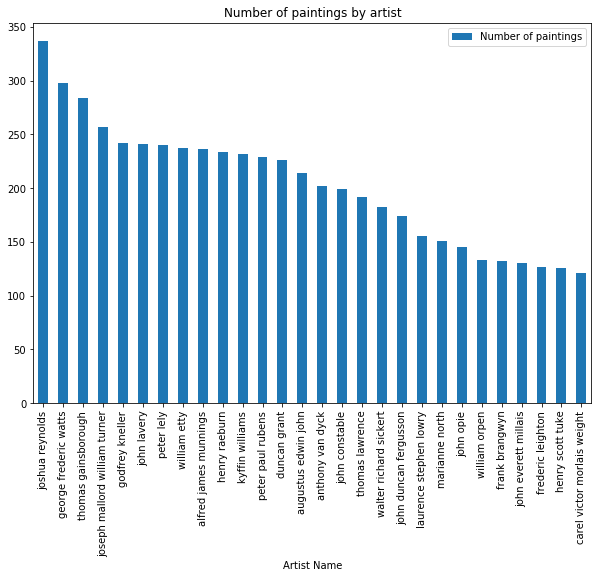

In [25]:
# Solution

c.execute('''
        SELECT artist_name, COUNT(artist_name)
        FROM fact_table f
        JOIN artists a ON f.artist_id = a.id
        JOIN paintings p ON f.painting_id = p.id
        GROUP BY artist_name
        ORDER BY COUNT(artist_name) DESC
        LIMIT 28
        ''')

dataframe = pd.DataFrame(data = c.fetchall(), columns = ['Artist Name', 'Number of paintings'])
dataframe.plot.bar(x='Artist Name',y='Number of paintings', title='Number of paintings by artist', figsize=(10,7))

plt.savefig('artist_number.jpg')

## Create Predictions Table

Load the prediction results for each painting (generated in Keras) back into the database.

In [26]:
# Create predictions table

c.execute('''DROP TABLE IF EXISTS predictions''')

c.execute('''
        CREATE TABLE predictions(
            image_filename text,
            pred_prob_a1 int,
            pred_prob_a2 int,
            pred_prob_a3 int,
            pred_artist1 text,
            pred_artist2 text,
            pred_artist3 text,
            pred_prob_s1 int,
            pred_prob_s2 int,
            pred_prob_s3 int,
            pred_style1 text,
            pred_style2 text,
            pred_style3 text,
            PRIMARY KEY(image_filename))''')


Column Lables:

~~~~
0 image_filename 
1 pred_prob_a1 
2 pred_prob_a2
3 pred_prob_a3 
4 pred_artist1 
5 pred_artist2 
6 pred_artist3
7 pred_prob_s1 
8 pred_prob_s2
9 pred_prob_s3 
10 pred_style1 
11 pred_style2 
12 pred_style3 
~~~~

In [27]:
def update_pred_database(conn, csv_file):    
    reader = csv.reader(open(csv_file, encoding='utf-8'))
    c = conn.cursor()
    
    next(reader, None)
    for row in reader:
        row = [item.lower() for item in row]
        
        # Insert data into dimension tables  
        #------------------------------------------------------------------------------------------------------------
        
        # Paintings dimension table
        
        try:
            c.execute('''
                INSERT INTO predictions(
                    image_filename,
                    pred_prob_a1,
                    pred_prob_a2,
                    pred_prob_a3,
                    pred_artist1,
                    pred_artist2,
                    pred_artist3,
                    pred_prob_s1,
                    pred_prob_s2,
                    pred_prob_s3,
                    pred_style1,
                    pred_style2,
                    pred_style3) VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?)
                ''', (row[0],row[1],row[2],row[3],row[4],row[5],row[6], \
                     row[7],row[8],row[9],row[10],row[11],row[12]))
        
        except sqlite3.Error as e:
            print("paintings, update error:", e.args[0])
        
        conn.commit()
        
update_pred_database(conn, 'Data/pred_cleaned.csv')

In [28]:
%%sql

SELECT *
FROM paintings
NATURAL JOIN predictions
LIMIT 5


Done.


[(1, 'wgascraping/slewinsk_roughsea.jpg', 'rough sea at belle-ile', '', '1904|oil on canvas 58 x 82 cm|', '1300*900|true color|', '', 'web gallery of art', 0.909133, 0.0370936, 0.0288409, 'henry scott tuke', ' frederic leighton', ' joseph mallord william turner', 0.397815, 0.195743, 0.183725, 'romanticism', ' realism', ' rococo'),
 (2, 'wgascraping/aachen_allegory.jpg', 'allegory', '', '1598|oil on copper 56 x 47 cm|', '708*827|true color|', '', 'web gallery of art', 0.719086, 0.251881, 0.00999663, 'peter paul rubens', ' anthony van dyck', ' william etty', 0.290792, 0.205673, 0.114579, 'baroque', ' mannerism', ' early renaissance'),
 (3, 'wgascraping/aachen_bacchus.jpg', 'bacchus; ceres and cupid', '', '-|oil on canvas 163 x 113 cm|', '723*1040|true color|', '', 'web gallery of art', 0.63465, 0.139232, 0.12621, 'william etty', ' peter paul rubens', ' anthony van dyck', 0.294741, 0.251808, 0.208369, 'baroque', ' mannerism', ' neoclassicism'),
 (4, 'wgascraping/aachen_j_couple.jpg', 'joking couple', '', '-|copperplate 25 x 20 cm|', '686*940|true color|', '', 'web gallery of art', 0.230541, 0.198145, 0.137691, 'joshua reynolds', ' henry raeburn', ' anthony van dyck', 0.549248, 0.289077, 0.0629277, 'high renaissance', ' mannerism', ' northern renaissance'),
 (5, 'wgascraping/aachen_rudolf2.jpg', 'portrait of emperor rudolf ii', 1595, '1590s|oil on canvas 60 x 48 cm|', '820*1023|true color|', '', 'web gallery of art', 0.26992, 0.228347, 0.210315, 'peter paul rubens', ' john everett millais', ' anthony van dyck', 0.675985, 0.204214, 0.0514636, 'baroque', ' mannerism', ' rococo')]

In [29]:
# Create predictions table

c.execute('''DROP TABLE IF EXISTS main''')

c.execute('''
        CREATE TABLE main(
            image_filename text,
            title text,
            release_year int,
            misc text,
            file_info text,
            web_url text,
            source text,
            style text,
            artist_name text,
            artist_school text,
            artist_years text,
            pred_prob_a1 int,
            pred_prob_a2 int,
            pred_prob_a3 int,
            pred_artist1 text,
            pred_artist2 text,
            pred_artist3 text,
            pred_prob_s1 int,
            pred_prob_s2 int,
            pred_prob_s3 int,
            pred_style1 text,
            pred_style2 text,
            pred_style3 text,
            PRIMARY KEY(image_filename))''')

In [30]:
%%sql

SELECT *
FROM fact_table f
      JOIN artists a ON f.artist_id = a.id
      JOIN paintings p ON f.painting_id = p.id
      JOIN styles s ON f.style_id = s.id
NATURAL JOIN predictions
LIMIT 1000

Done.


[(1, 1, 1, 1, 'œlewiñski w³adis³aw', 'polish painter  (paris)', '(1856-1918)', 1, 'wgascraping/slewinsk_roughsea.jpg', 'rough sea at belle-ile', '', '1904|oil on canvas 58 x 82 cm|', '1300*900|true color|', '', 'web gallery of art', 1, 'impressionism', 0.909133, 0.0370936, 0.0288409, 'henry scott tuke', ' frederic leighton', ' joseph mallord william turner', 0.397815, 0.195743, 0.183725, 'romanticism', ' realism', ' rococo'),
 (2, 2, 2, 2, 'aachen hans von', 'german painter ', '(1552-1615)', 2, 'wgascraping/aachen_allegory.jpg', 'allegory', '', '1598|oil on copper 56 x 47 cm|', '708*827|true color|', '', 'web gallery of art', 2, 'mannerism', 0.719086, 0.251881, 0.00999663, 'peter paul rubens', ' anthony van dyck', ' william etty', 0.290792, 0.205673, 0.114579, 'baroque', ' mannerism', ' early renaissance'),
 (3, 2, 2, 2, 'aachen hans von', 'german painter ', '(1552-1615)', 3, 'wgascraping/aachen_bacchus.jpg', 'bacchus; ceres and cupid', '', '-|oil on canvas 163 x 113 cm|', '723*1040|true color|', '', 'web gallery of art', 2, 'mannerism', 0.63465, 0.139232, 0.12621, 'william etty', ' peter paul rubens', ' anthony van dyck', 0.294741, 0.251808, 0.208369, 'baroque', ' mannerism', ' neoclassicism'),
 (4, 2, 2, 2, 'aachen hans von', 'german painter ', '(1552-1615)', 4, 'wgascraping/aachen_j_couple.jpg', 'joking couple', '', '-|copperplate 25 x 20 cm|', '686*940|true color|', '', 'web gallery of art', 2, 'mannerism', 0.230541, 0.198145, 0.137691, 'joshua reynolds', ' henry raeburn', ' anthony van dyck', 0.549248, 0.289077, 0.0629277, 'high renaissance', ' mannerism', ' northern renaissance'),
 (5, 2, 2, 2, 'aachen hans von', 'german painter ', '(1552-1615)', 5, 'wgascraping/aachen_rudolf2.jpg', 'portrait of emperor rudolf ii', 1595, '1590s|oil on canvas 60 x 48 cm|', '820*1023|true color|', '', 'web gallery of art', 2, 'mannerism', 0.26992, 0.228347, 0.210315, 'peter paul rubens', ' john everett millais', ' anthony van dyck', 0.675985, 0.204214, 0.0514636, 'baroque', ' mannerism', ' rococo'),
 (6, 2, 2, 2, 'aachen hans von', 'german painter ', '(1552-1615)', 6, 'wgascraping/aachen_selfport.jpg', 'self-portrait with a glass of wine', 1596, 'c. 1596|oil on canvas 53 x 44 cm|', '896*1074|true color|', '', 'web gallery of art', 2, 'mannerism', 0.390725, 0.369831, 0.119531, 'george frederic watts', ' john opie', ' frederic leighton', 0.316238, 0.30625, 0.231748, 'baroque', ' rococo', ' neoclassicism'),
 (7, 3, 3, 3, 'aagaard carl frederik', 'danish painter  (copenhagen)', '(1833-1895)', 7, 'wgascraping/aagaard_deerlake.jpg', 'deer beside a lake', '', '1888|oil on canvas 53 x 82 cm|', '1200*818|true color|', '', 'web gallery of art', 3, 'realism', 0.342501, 0.229123, 0.153876, 'duncan grant', ' walter richard sickert', ' carel victor morlais weight', 0.398089, 0.260787, 0.177517, 'realism', ' impressionism', ' romanticism'),
 (8, 3, 3, 3, 'aagaard carl frederik', 'danish painter  (copenhagen)', '(1833-1895)', 8, 'wgascraping/aagaard_rosegard.jpg', 'the rose garden', '', '1877|oil on canvas 98 x 80 cm|', '875*950|true color|', '', 'web gallery of art', 3, 'realism', 0.314961, 0.129852, 0.125879, 'henry scott tuke', ' john lavery', ' carel victor morlais weight', 0.774203, 0.0854399, 0.064668, 'impressionism', ' realism', ' romanticism'),
 (9, 4, 4, 4, 'abadia juan de la', 'spanish painter  (huesca)', '(active 1470-1490)', 9, 'wgascraping/abadia_michael.jpg', 'the archangel michael', 1490, 'c. 1490|wood 127 x 78 cm|', '637*1060|true color|', '', 'web gallery of art', 4, 'early renaissance', 0.412953, 0.26282, 0.142666, 'duncan grant', ' carel victor morlais weight', ' frank brangwyn', 0.655752, 0.189348, 0.1525, 'medieval', ' northern renaissance', ' early renaissance'),
 (10, 5, 2, 5, "abbate niccolò dell'", 'italian painter  (bologna)', '(1509-1571)', 10, 'wgascraping/abbate_chimney1.jpg', 'chimney breast', 1552, 'c. 1552|-|', '900*1328|true color|', '', 'web gallery of art', 2, 'mannerism', 0.923532, 0.0371259, 0.0177468, 'duncan grant',

In [31]:
%%sql

INSERT INTO main
SELECT image_filename, title text, release_year, misc, file_info, web_url, source, style, artist_name,artist_school,artist_years,pred_prob_a1,pred_prob_a2,pred_prob_a3,pred_artist1,pred_artist2,pred_artist3,pred_prob_s1,pred_prob_s2,pred_prob_s3,pred_style1,pred_style2,pred_style3
FROM (SELECT *
      FROM fact_table f
          JOIN artists a ON f.artist_id = a.id
          JOIN paintings p ON f.painting_id = p.id
          JOIN styles s ON f.style_id = s.id)
NATURAL JOIN predictions



32129 rows affected.


[]

In [32]:
%%sql

SELECT *
FROM main
WHERE image_filename = 'wgascraping/asch_citywall.jpg'

Done.


[('wgascraping/asch_citywall.jpg', 'the delft city wall with the houttuinen', 1650, 'c. 1650|oil on canvas 53 x 76 cm|', '1139*770|true color|', '', 'web gallery of art', 'baroque', 'asch pieter jansz. van', 'dutch painter  (delft)', '(1603-1678)', 0.542248, 0.247443, 0.0881508, 'alfred james munnings', ' marianne north', ' carel victor morlais weight', 0.242586, 0.220959, 0.171767, 'romanticism', ' baroque', ' rococo')]

## Calculate/Plot Percent Accuracy

In [47]:
%%sql

SELECT count(*)
FROM main
WHERE style == 'baroque' 

Done.


[(7868,)]

In [48]:
%%sql

SELECT count(*)
FROM main
WHERE style == 'baroque' AND pred_style1 == 'baroque'

Done.


[(3410,)]

In [51]:
%%sql

SELECT count(*)
FROM main
WHERE style == 'baroque' AND pred_style2 == ' baroque'

Done.


[(1297,)]

In [53]:
%%sql

SELECT count(*)
FROM main
WHERE style = 'baroque' AND pred_style3 == ' baroque'

Done.


[(1109,)]

In [37]:
%%sql

SELECT count(*)
FROM main
WHERE style = 'romanticism'

Done.


[(2649,)]

In [38]:
%%sql

SELECT count(*)
FROM main
WHERE style = 'romanticism' AND pred_style1 = 'romanticism'

Done.


[(486,)]

In [54]:
%%sql

SELECT count(*)
FROM main
WHERE style = 'romanticism' AND pred_style2 = ' romanticism'

Done.


[(595,)]

In [55]:
%%sql

SELECT count(*)
FROM main
WHERE style = 'romanticism' AND pred_style3 = ' romanticism'

Done.


[(515,)]

In [41]:
%%sql

SELECT count(*)
FROM main
WHERE style = 'impressionism'

Done.


[(2246,)]

In [57]:
%%sql

SELECT count(*)
FROM main
WHERE style = 'impressionism' AND pred_style1 = 'impressionism'

Done.


[(967,)]

In [58]:
%%sql

SELECT count(*)
FROM main
WHERE style = 'impressionism' AND pred_style2 = ' impressionism'

Done.


[(573,)]

In [59]:
%%sql

SELECT count(*)
FROM main
WHERE style = 'impressionism' AND pred_style3 = ' impressionism'

Done.


[(181,)]

In [60]:
%%sql

SELECT count(*)
FROM main
WHERE style = 'rococo'

Done.


[(2229,)]

In [63]:
%%sql

SELECT count(*)
FROM main
WHERE style = 'rococo' AND pred_style1 = 'rococo'

Done.


[(837,)]

In [64]:
%%sql

SELECT count(*)
FROM main
WHERE style = 'rococo' AND pred_style2 = ' rococo'

Done.


[(575,)]

In [67]:
%%sql

SELECT count(*)
FROM main
WHERE style == 'rococo' AND pred_style3 == ' rococo'

Done.


[(335,)]

In [68]:
%%sql

SELECT count(*)
FROM main
WHERE style = 'mannerism'

Done.


[(1381,)]

In [70]:
%%sql

SELECT count(*)
FROM main
WHERE style == 'mannerism' AND pred_style1 == 'mannerism'

Done.


[(374,)]

In [72]:
%%sql

SELECT count(*)
FROM main
WHERE style == 'mannerism' AND pred_style2 == ' mannerism'

Done.


[(410,)]

In [73]:
%%sql

SELECT count(*)
FROM main
WHERE style == 'mannerism' AND pred_style3 == ' mannerism'

Done.


[(195,)]

Results:
~~~~

For each class, the percentage of the class being right in any of the first three 
classes 
 
(pred_style1, pred_style2, and pred_style3) was the following:

Baroque: 73.9%
Romanticism: 60.2%
Impressionism: 76.6%
Rococo: 78.3%
Mannerism: 70.8%

These are the styles with the greatest number of images.

Sample calculation:

For Baroque, there were a total of 7868 images in the class.
pred_style1 "baroque" occurances: 3410
pred_style2 "baroque" occurances: 1297
pred_style3 "baroque" occurances: 1109

Percentage occured in first three = (3410+1297+1109)/(7868) = 73.9%
Percentage occured in first (pred_style1 only) = (1297)/(7868) = 16.7%
~~~~